# Modelling 1
# Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('automobile2.csv', header=None)

headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
'body-style','drive-wheels','engine-location','wheel-base','length','width','height','curp-weight',
'engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ration',
'horsepower','peak-rpm','city-mpg','highway-mpg','price']

df.columns = headers

df.dropna(axis=0, inplace=True)
print(df.dtypes)
df.head()



symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curp-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ration    float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


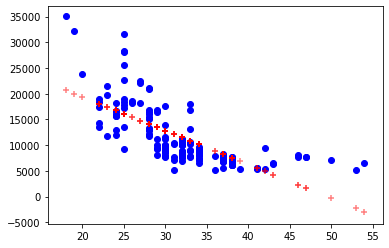

1.Using highway mpg as X, MSE =  16529789.914714003
1.Using highway mpg as X, RMSE =  4065.6844337348666


In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']

reg.fit(X,Y)
Yp = reg.predict(X)

plt.figure()
plt.scatter(X['highway-mpg'],Y, color='blue', marker='o')
plt.scatter(X['highway-mpg'],Yp, color='red', marker='+', alpha=0.5)
plt.show()

mse = mean_squared_error(Y,Yp)
print('1.Using highway mpg as X, MSE = ',str(mse))
print('1.Using highway mpg as X, RMSE = ',str(np.sqrt(mse)))

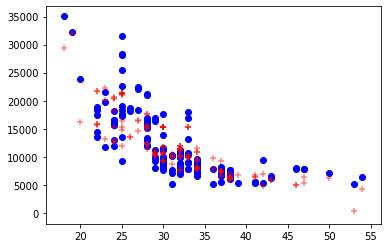

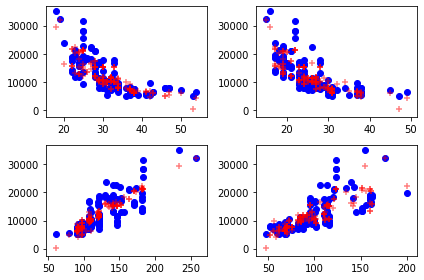

1.Using 4 attributes as X, MSE =  8864871.342975475
1.Using 4 attributes as X, RMSE =  2977.3933806226337


In [3]:
reg = LinearRegression()
att = ['highway-mpg','city-mpg', 'engine-size', 'horsepower']
X = df[['highway-mpg','city-mpg', 'engine-size', 'horsepower']]
Y = df['price']

reg.fit(X,Y)
Yp = reg.predict(X)

plt.figure()
plt.scatter(X['highway-mpg'],Y, color='blue', marker='o')
plt.scatter(X['highway-mpg'],Yp, color='red', marker='+', alpha=0.5)
plt.show()

nr, nc = 2, 2
fig, axs = plt.subplots(nr,nc, tight_layout=True)
for i in range(0,len(att)):
    x = int(i / nr)
    y = i % nr
    col = att[i]
    axs[x,y].scatter(X[col],Y, color='blue', marker='o')
    axs[x,y].scatter(X[col],Yp, color='red', marker='+', alpha=0.5)
plt.show()


mse = mean_squared_error(Y,Yp)
print('1.Using 4 attributes as X, MSE = ',str(mse))
print('1.Using 4 attributes as X, RMSE = ',str(np.sqrt(mse)))

In [4]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

att = ['highway-mpg','city-mpg', 'engine-size', 'horsepower']
X = df[['highway-mpg','city-mpg', 'engine-size', 'horsepower']]
Y = df['price']

modelnames = ['Multiple Linear Regression','SVR', 'Decision Tree Regressor', 'Random Forest Regressor']
models = [LinearRegression(), SVR(kernel='linear'), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=25, max_depth=50)]
rmse = [0,0,0,0]
mse = [0,0,0,0]
r2s = [0,0,0,0]

for i in range(0,len(models)):
    models[i].fit(X,Y)
    Yp = models[i].predict(X)
    mse[i] = mean_squared_error(Y,Yp)
    rmse[i] = np.sqrt(mse[i])
    r2s[i]  = r2_score(Y,Yp)
    
print(modelnames)
print(mse)
print(rmse)
print(r2s)




['Multiple Linear Regression', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor']
[8864871.342975475, 9482022.561618552, 863655.6512928022, 1261459.9355500508]
[2977.3933806226337, 3079.2892948890903, 929.3307545178961, 1123.1473347473388]
[0.7417891061308053, 0.7238130789948262, 0.9748439329700813, 0.9632569176769094]


(0, 37230.157761566996)

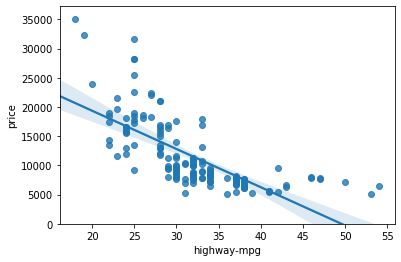

In [5]:
import seaborn as sns

sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)


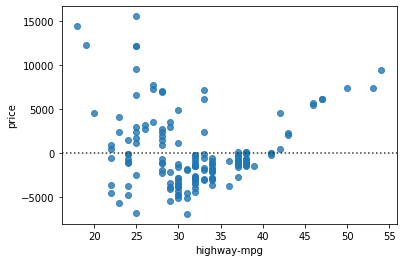

In [6]:
sns.residplot(df['highway-mpg'], df['price'])

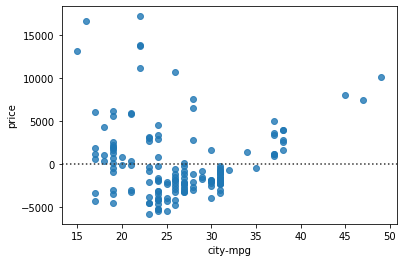

In [7]:
sns.residplot(df['city-mpg'], df['price'])

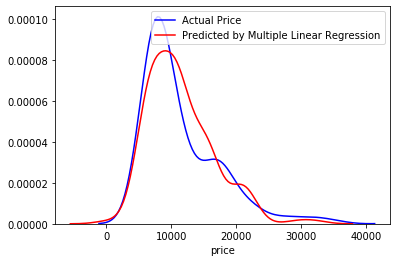

In [9]:
colors = ['r','yellowgreen','gold','magenta']
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Price')
sns.distplot(models[0].predict(X), hist=False, color=colors[0], label='Predicted by '+modelnames[0], ax=ax1)

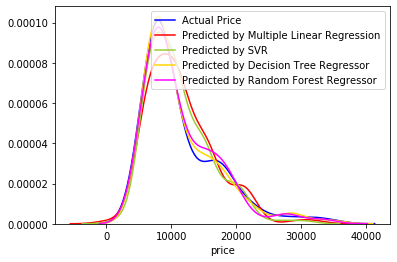

In [10]:
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Price')
colors = ['r','yellowgreen','gold','magenta']
for i in range(0,len(models)):
    sns.distplot(models[i].predict(X), hist=False, color=colors[i], label='Predicted by '+modelnames[i], ax=ax1)
